# Cross Validation

In [29]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score , KFold ,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
#Loading the iris data from sklearn.datasets
iris = load_iris()
x=iris.data
y=iris.target

In [7]:
# Creating a K-Nearest Neighbors (KNN) classifier with 3 neighbors
model=KNeighborsClassifier(n_neighbors=3)

In [8]:
# Number of folds for cross-validation
k_folds = 5

In [9]:
# Creating a KFold object for 5-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [10]:
# Performing cross-validation and obtaining accuracy scores
scores = cross_val_score(model,x,y,cv=kf,scoring='accuracy')

In [11]:
# Printing Cross-Validation Scores
print("Cross-Validation Scores:", scores)

# Calculating and printing Mean Accuracy
print("Mean Accuracy:", np.mean(scores))

# Calculating and printing Standard Deviation of Accuracy
print("Standard Deviation of Accuracy:", np.std(scores))


Cross-Validation Scores: [1.         0.96666667 0.96666667 0.93333333 0.96666667]
Mean Accuracy: 0.9666666666666668
Standard Deviation of Accuracy: 0.02108185106778919


Interpretation:

The mean accuracy of approximately 96.67% indicates that, on average, the model performs well across different subsets of the data.

The small standard deviation of approximately 0.0211 suggests that the model's performance is consistent across the folds

In [15]:
# Obtaining cross-validated predictions
ypred= cross_val_predict(model,x,y,cv=kf)

In [16]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# Calculating Weighted Precision
precision = precision_score(y,ypred,average='weighted')

# Calculating Weighted Recall
recall = recall_score(y,ypred,average='weighted')

# Calculating Weighted F1-score
f1 = f1_score(y,ypred,average='weighted')

In [19]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9667867146858743
Recall: 0.9666666666666667
F1 Score: 0.9666633329999667


In [20]:
# Importing necessary functions for model evaluation
from sklearn.metrics import confusion_matrix , classification_report

In [25]:
# Generating the confusion matrix for the model's predictions on the entire dataset
conf_matrix = confusion_matrix(y,ypred)

# Generating a classification report for the model's predictions on the entire dataset
classification = classification_report (y,ypred)

In [26]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification)

Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



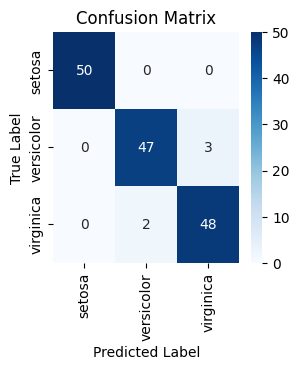

In [31]:
# Plotting the Confusion Matrix using seaborn and matplotlib
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()